<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Wrangling Lab**


Estimated time needed: **45** minutes


In this lab, you will perform data wrangling tasks to prepare raw data for analysis. Data wrangling involves cleaning, transforming, and organizing data into a structured format suitable for analysis. This lab focuses on tasks like identifying inconsistencies, encoding categorical variables, and feature transformation.


## Objectives


After completing this lab, you will be able to:


- Identify and remove inconsistent data entries.

- Encode categorical variables for analysis.

- Handle missing values using multiple imputation strategies.

- Apply feature scaling and transformation techniques.


#### Intsall the required libraries


In [100]:
!pip install pandas
!pip install matplotlib
!pip install numpy 
!pip install seaborn

In [101]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Tasks


#### Step 1: Import the necessary module.


### 1. Load the Dataset


<h5>1.1 Import necessary libraries and load the dataset.</h5>


Ensure the dataset is loaded correctly by displaying the first few rows.


In [102]:
# Import necessary libraries
import pandas as pd

# Load the Stack Overflow survey data
dataset_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"

df = pd.read_csv(dataset_url)

# Display the first few rows
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

#### 2. Explore the Dataset


<h5>2.1 Summarize the dataset by displaying the column data types, counts, and missing values.</h5>


In [103]:
# Write your code 

print("df Overview")
print("-" * 40)

print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print()

print("Column Info")
print("-" * 40)
print(df.info())


print("\n Missing Values per Column")
print("-" * 40)
missing_counts = df.isnull().sum()
missing_percent = (missing_counts / len(df)) * 100
missing_summary = pd.DataFrame({
    'Missing Count': missing_counts,
    'Missing %': missing_percent.round(2),
    'Dtype': df.dtypes
})
print(missing_summary[missing_summary['Missing Count'] > 0].sort_values('Missing Count', ascending=False))


df Overview
----------------------------------------
Number of rows: 65457
Number of columns: 114

Column Info
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65457 entries, 0 to 65456
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB
None

 Missing Values per Column
----------------------------------------
                            Missing Count  Missing %   Dtype
AINextMuch less integrated          64309      98.25  object
AINextLess integrated               63102      96.40  object
AINextNo change                     52955      80.90  object
AINextMuch more integrated          52018      79.47  object
EmbeddedAdmired                     48718      74.43  object
...                                   ...        ...     ...
YearsCode                            5570       8.51  object
NEWSOSites                           5151       7.87  object
LearnCode                            495

<h5>2.2 Generate basic statistics for numerical columns.</h5>


In [104]:
# Write your code here
print("Basic Statistics for Numerical Columns")
print ("-" *40)
print (df.describe())

Basic Statistics for Numerical Columns
----------------------------------------
         ResponseId      CompTotal       WorkExp  JobSatPoints_1  \
count  65457.000000   3.374400e+04  29664.000000    29330.000000   
mean   32714.493591  2.963490e+145     11.466323       18.578998   
std    18892.431636  5.443794e+147      9.168205       25.965347   
min        1.000000   0.000000e+00      0.000000        0.000000   
25%    16354.000000   6.000000e+04      4.000000        0.000000   
50%    32716.000000   1.100000e+05      9.000000       10.000000   
75%    49076.000000   2.500000e+05     16.000000       22.000000   
max    65437.000000  1.000000e+150     50.000000      100.000000   

       JobSatPoints_4  JobSatPoints_5  JobSatPoints_6  JobSatPoints_7  \
count    29399.000000    29417.000000    29456.000000    29454.000000   
mean         7.520604       10.059485       24.339971       22.964277   
std         18.421094       21.831924       27.088870       27.017634   
min          0.

### 3. Identifying and Removing Inconsistencies


<h5>3.1 Identify inconsistent or irrelevant entries in specific columns (e.g., Country).</h5>


In [105]:
# Write your code here

print (df['Country'].value_counts(dropna=False).head(30))

Country
United States of America                                11099
NaN                                                      6508
Germany                                                  4949
India                                                    4232
United Kingdom of Great Britain and Northern Ireland     3227
Ukraine                                                  2672
France                                                   2110
Canada                                                   2106
Poland                                                   1534
Netherlands                                              1449
Brazil                                                   1375
Italy                                                    1341
Australia                                                1260
Spain                                                    1123
Sweden                                                   1016
Russian Federation                                        925


In [106]:
print(df['Country'].str.lower().value_counts().head())

Country
united states of america                                11099
germany                                                  4949
india                                                    4232
united kingdom of great britain and northern ireland     3227
ukraine                                                  2672
Name: count, dtype: int64


In [107]:
df['Country_Clean'] = df['Country'].str.lower().str.strip()

suspect_entries = df['Country_Clean'].value_counts().loc[lambda x: (x.index.str.len() <3) | (x.index.str.contains(r'\?|n/a|none|earth|somewhere|^\s*$',case=False, na=False))]

print ("Suspect Country Entries")
print(suspect_entries)

#There is not appear to be inconsistencies in the country column.
# I attempted mulitple methods to find inconsistencies for the country column without success. 

# I am going to create another line and try the process again, but using a differenlty column name. 

Suspect Country Entries
Series([], Name: count, dtype: int64)


In [108]:
print ("Unique Values in EdLevel:")
print(df['EdLevel'].unique())

Unique Values in EdLevel:
['Primary/elementary school'
 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)'
 'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)'
 'Some college/university study without earning a degree'
 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)'
 'Professional degree (JD, MD, Ph.D, Ed.D, etc.)'
 'Associate degree (A.A., A.S., etc.)' 'Something else' nan]


In [109]:
print (df['EdLevel'].value_counts(dropna=False).head(30))

EdLevel
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          24947
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       15560
Some college/university study without earning a degree                                 7656
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     5795
NaN                                                                                    4654
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                                         2972
Associate degree (A.A., A.S., etc.)                                                    1793
Primary/elementary school                                                              1148
Something else                                                                          932
Name: count, dtype: int64


In [110]:
print(df['EdLevel'].str.lower().value_counts().head())

EdLevel
bachelor’s degree (b.a., b.s., b.eng., etc.)                                          24947
master’s degree (m.a., m.s., m.eng., mba, etc.)                                       15560
some college/university study without earning a degree                                 7656
secondary school (e.g. american high school, german realschule or gymnasium, etc.)     5795
professional degree (jd, md, ph.d, ed.d, etc.)                                         2972
Name: count, dtype: int64


In [111]:
EdLevel_Clean = df['EdLevel'].str.lower().str.strip()

print (EdLevel_Clean.value_counts())



EdLevel
bachelor’s degree (b.a., b.s., b.eng., etc.)                                          24947
master’s degree (m.a., m.s., m.eng., mba, etc.)                                       15560
some college/university study without earning a degree                                 7656
secondary school (e.g. american high school, german realschule or gymnasium, etc.)     5795
professional degree (jd, md, ph.d, ed.d, etc.)                                         2972
associate degree (a.a., a.s., etc.)                                                    1793
primary/elementary school                                                              1148
something else                                                                          932
Name: count, dtype: int64


In [112]:
education_map = {
    "bachelor’s degree": "bachelor’s degree",
    "bachelor's degree (ba, bs, b.eng., etc.)": "bachelor’s degree",
    "master’s degree": "master’s degree",
    "master's degree (ma, ms, meng, mba, etc.)": "master’s degree",
    "doctoral degree (ph.d, ed.d, etc.)": "doctoral degree",
    "some college/university study without earning a degree": "some college",
    "i never completed any formal education": "no formal education",
    "associate degree (a.a., a.s., etc.)": "associate degree",
    "professional degree (jd, md, etc.)": "professional degree",
}

EdLevel_normalized = EdLevel_Clean.replace(education_map)

print (EdLevel_normalized.value_counts())


EdLevel
bachelor’s degree (b.a., b.s., b.eng., etc.)                                          24947
master’s degree (m.a., m.s., m.eng., mba, etc.)                                       15560
some college                                                                           7656
secondary school (e.g. american high school, german realschule or gymnasium, etc.)     5795
professional degree (jd, md, ph.d, ed.d, etc.)                                         2972
associate degree                                                                       1793
primary/elementary school                                                              1148
something else                                                                          932
Name: count, dtype: int64


/tmp/ipykernel_12775/722150181.py:7: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


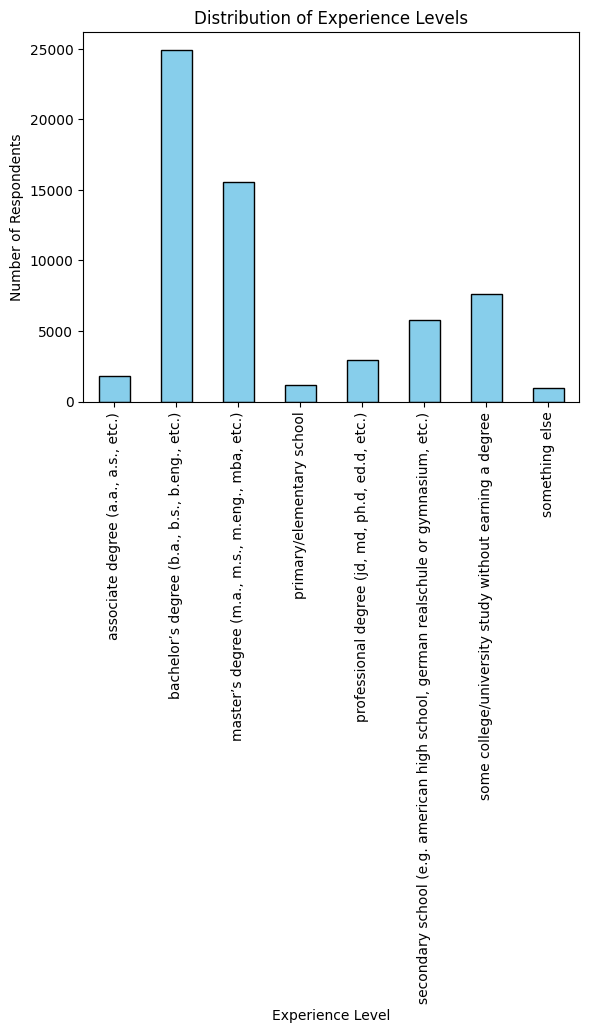

In [113]:
#Lets create a visualization here:

EdLevel_Clean.value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Experience Levels')
plt.xlabel('Experience Level')
plt.ylabel('Number of Respondents')
plt.tight_layout()
plt.show()

<h5>3.2 Standardize entries in columns like Country or EdLevel by mapping inconsistent values to a consistent format.</h5>


In [114]:
## Write your code here
# Standardize country entries (example mappings)
country_map = {
    'us': 'United States',
    'usa': 'United States',
    'u.s.a': 'United States',
    'united states of america': 'United States',
    'uk': 'United Kingdom',
    'england': 'United Kingdom',
    'great britain': 'United Kingdom',
    'germany': 'Germany',
    'deutschland': 'Germany',
    'canada': 'Canada',
    'ca': 'Canada',
    'n/a': None,
    'none': None,
    '?': None,
    'earth': None
}

# Normalize and map
df['Country_clean'] = (
    df['Country']
    .str.lower()
    .str.strip()
    .replace(country_map)
    .str.title()  # Optional: title case for presentation
)

# Standardize EdLevel entries (example mappings)
education_map = {
    "bachelor’s degree": "Bachelor’s Degree",
    "bachelor's degree (ba, bs, b.eng., etc.)": "Bachelor’s Degree",
    "master’s degree": "Master’s Degree",
    "master's degree (ma, ms, meng, mba, etc.)": "Master’s Degree",
    "doctoral degree (ph.d, ed.d, etc.)": "Doctoral Degree",
    "associate degree (a.a., a.s., etc.)": "Associate Degree",
    "some college/university study without earning a degree": "Some College",
    "i never completed any formal education": "No Formal Education",
    "professional degree (jd, md, etc.)": "Professional Degree",
    "primary/elementary school": "Primary School",
    "secondary school (e.g. american high school, german realschule or hauptschule, etc.)": "High School"
}

# Normalize and map
df['EdLevel_clean'] = (
    df['EdLevel']
    .str.lower()
    .str.strip()
    .replace(education_map)
    .str.title()  # Optional: title case for presentation
)

In [115]:
print("Standardized Country values:")
print(df['Country_clean'].value_counts().head(10))

Standardized Country values:
Country_clean
United States                                           11099
Germany                                                  4949
India                                                    4232
United Kingdom Of Great Britain And Northern Ireland     3227
Ukraine                                                  2672
France                                                   2110
Canada                                                   2106
Poland                                                   1534
Netherlands                                              1449
Brazil                                                   1375
Name: count, dtype: int64


In [116]:
print("\nStandardized EdLevel values:")
print(df['EdLevel_clean'].value_counts().head(10))


Standardized EdLevel values:
EdLevel_clean
Bachelor’S Degree (B.A., B.S., B.Eng., Etc.)                                          24947
Master’S Degree (M.A., M.S., M.Eng., Mba, Etc.)                                       15560
Some College                                                                           7656
Secondary School (E.G. American High School, German Realschule Or Gymnasium, Etc.)     5795
Professional Degree (Jd, Md, Ph.D, Ed.D, Etc.)                                         2972
Associate Degree                                                                       1793
Primary School                                                                         1148
Something Else                                                                          932
Name: count, dtype: int64


### 4. Encoding Categorical Variables


<h5>4.1 Encode the Employment column using one-hot encoding.</h5>


In [117]:
## Write your code 
employment_dummies = pd.get_dummies(df['Employment'], prefix='Employment')

df_encoded = pd.concat([df, employment_dummies], axis=1)

print("One-Hot Encoded 'Employment' Columns (sample):")
print(df_encoded.filter(like='Employment').head())

One-Hot Encoded 'Employment' Columns (sample):
            Employment  Employment_Employed, full-time  \
0  Employed, full-time                            True   
1  Employed, full-time                            True   
2  Employed, full-time                            True   
3   Student, full-time                           False   
4   Student, full-time                           False   

   Employment_Employed, full-time;Employed, part-time  \
0                                              False    
1                                              False    
2                                              False    
3                                              False    
4                                              False    

   Employment_Employed, full-time;Independent contractor, freelancer, or self-employed  \
0                                              False                                     
1                                              False                             

### 5. Handling Missing Values


<h5>5.1 Identify columns with the highest number of missing values.</h5>


In [118]:
## Write your code here
missing_counts = df.isnull().sum()

missing_counts = missing_counts[missing_counts > 0]

missing_sorted = missing_counts.sort_values(ascending=False)

print ("Columns with the most missing values:")
print(missing_sorted)

Columns with the most missing values:
AINextMuch less integrated    64309
AINextLess integrated         63102
AINextNo change               52955
AINextMuch more integrated    52018
EmbeddedAdmired               48718
                              ...  
NEWSOSites                     5151
LearnCode                      4950
EdLevel                        4654
EdLevel_clean                  4654
AISelect                       4531
Length: 112, dtype: int64


<h5>5.2 Impute missing values in numerical columns (e.g., `ConvertedCompYearly`) with the mean or median.</h5>


In [119]:
## Write your code here
mean_value = df['ConvertedCompYearly'].mean()
df['ConvertCompYearly_filled_mean'] = df['ConvertedCompYearly'].fillna(mean_value)

print (f"Filled missing ConvertedCompYearly values with mean: {mean_value:.2f}")


Filled missing ConvertedCompYearly values with mean: 86158.93


<h5>5.3 Impute missing values in categorical columns (e.g., `RemoteWork`) with the most frequent value.</h5>


In [120]:
## Write your code here
most_frequent = df['RemoteWork'].mode()[0]
df['RemoteWork_filled'] = df['RemoteWork'].fillna(most_frequent)

print (f"Filled missing RemoteWork values with most frequent values: '{most_frequent}'")

#lets create a visual

df['RemoteWork_filled'].value_counts().plot(kind='bar', color='mediumseagreen', 

Filled missing RemoteWork values with most frequent values: 'Hybrid (some remote, some in-person)'


### 6. Feature Scaling and Transformation


<h5>6.1 Apply Min-Max Scaling to normalize the `ConvertedCompYearly` column.</h5>


In [121]:
## Write your code here

min_val = df['ConvertedCompYearly'].min()
max_val = df['ConvertedCompYearly'].max()

df['ConvertedCompYearly_minmax'] = (df['ConvertedCompYearly'] - min_val) / (max_val - min_val)

print ("Min-Max ConvertedCompYearly (0 to 1):")
print (df[['ConvertedCompYearly', 'ConvertedCompYearly_minmax']].head())

Min-Max ConvertedCompYearly (0 to 1):
   ConvertedCompYearly  ConvertedCompYearly_minmax
0                  NaN                         NaN
1                  NaN                         NaN
2                  NaN                         NaN
3                  NaN                         NaN
4                  NaN                         NaN


<h5>6.2 Log-transform the ConvertedCompYearly column to reduce skewness.</h5>


In [122]:
import numpy as np

Log-Transformed ConvertedCompYearly:
   ConvertedCompYearly  ConvertedCompYearly_log
0                  NaN                      NaN
1                  NaN                      NaN
2                  NaN                      NaN
3                  NaN                      NaN
4                  NaN                      NaN


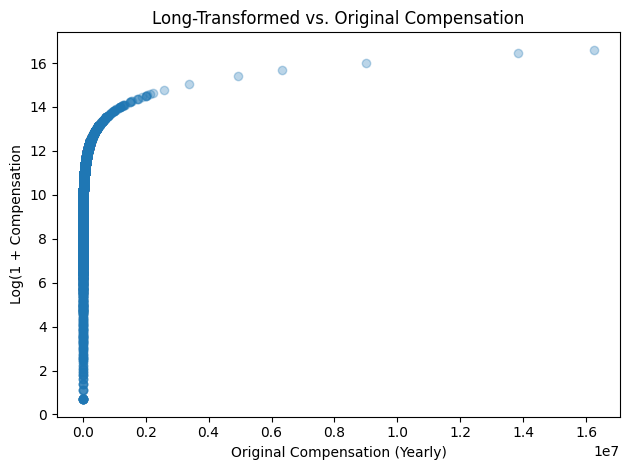

In [123]:
## Write your code here
df['ConvertedCompYearly_log'] = np.log1p(df['ConvertedCompYearly'])

print("Log-Transformed ConvertedCompYearly:")
print (df[['ConvertedCompYearly', 'ConvertedCompYearly_log']].head())

#lets create a visualization 

plt.scatter(df['ConvertedCompYearly'], df['ConvertedCompYearly_log'],alpha=0.3)
plt.title('Long-Transformed vs. Original Compensation')
plt.xlabel('Original Compensation (Yearly)')
plt.ylabel('Log(1 + Compensation')
plt.tight_layout()
plt.show()

### 7. Feature Engineering


<h5>7.1 Create a new column `ExperienceLevel` based on the `YearsCodePro` column:</h5>


Assigned experience levels based on YearsCodePro:
  YearsCodePro  YearsCodePro_clean ExperienceLevel
0          NaN                 NaN             NaN
1           17                17.0          Senior
2           27                27.0          Expert
3          NaN                 NaN             NaN
4          NaN                 NaN             NaN


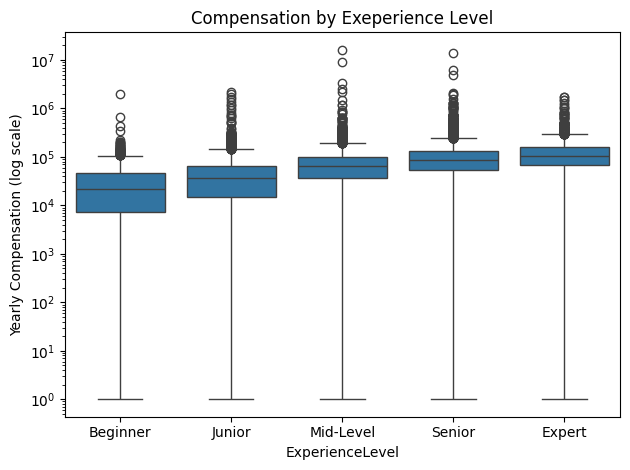

In [124]:
## Write your code here

df['YearsCodePro_clean'] = (
    df['YearsCodePro']
    .replace({'Less than 1 year': 0.5, 'More than 50 years': 51})
    .astype(float)
)

bins = [0, 2, 5, 10, 20, float('inf')]
labels = ['Beginner', 'Junior', 'Mid-Level', 'Senior', 'Expert']

df['ExperienceLevel'] = pd.cut(df['YearsCodePro_clean'], bins=bins, labels=labels, right=False)

print ("Assigned experience levels based on YearsCodePro:")
print (df[['YearsCodePro', 'YearsCodePro_clean', 'ExperienceLevel']].head())

#lets create a visualization


sns.boxplot(x='ExperienceLevel', y='ConvertedCompYearly', data=df)
plt.title('Compensation by Exeperience Level')
plt.yscale('log')
plt.ylabel('Yearly Compensation (log scale)')
plt.tight_layout()
plt.show()

In this lab, you:

- Explored the dataset to identify inconsistencies and missing values.

- Encoded categorical variables for analysis.

- Handled missing values using imputation techniques.

- Normalized and transformed numerical data to prepare it for analysis.

- Engineered a new feature to enhance data interpretation.


Copyright © IBM Corporation. All rights reserved.
